**Create Data** - We begin by creating our own data set for analysis. This prevents the end user reading this tutorial from having to download any files to replicate the results below. We will export this data set to a text file so that you can get some experience pulling data from a text file.

**Get Data** - We will learn how to read in the text file. The data consist of baby names and the number of baby names born in the year 1880. 

**Prepare Data** - Here we will simply take a look at the data and make sure it is clean. By clean I mean we will take a look inside the contents of the text file and look for any anomalities. These can include missing data, inconsistencies in the data, or any other data that seems out of place. If any are found we will then have to make decisions on what to do with these records. 

**Analyze Data** - We will simply find the most popular name in a specific year. 

**Present Data** - Through tabular data and a graph, clearly show the end user what is the most popular name in a specific year.

The ***pandas*** library is used for all the data analysis excluding a small piece of the data presentation section. The ***matplotlib*** library will only be needed for the data presentation section. Importing the libraries is the first step we will take in the lesson.

In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.2 |Anaconda, Inc.| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.20.3
Matplotlib version 2.0.2


# Create Data

The data set will consist of 5 MLI names and the number of project they were used for that year (2016).

In [3]:
# The inital set of MLI names and project usage rate
mlis = ['A010','A210','0017','0124','0404']
projects = [371, 364, 241, 256, 186]

To merge these two lists together we will use the zip function.

In [4]:
zip?

In [5]:
MLIDataSet = list(zip(mlis,projects))
MLIDataSet

[('A010', 371), ('A210', 364), ('0017', 241), ('0124', 256), ('0404', 186)]

We are basically done creating the data set. We now will use the ***pandas*** library to export this data set into a csv file.

***df*** will be a ***DataFrame*** object. You can think of this object holding the contents of the MLIDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside ***df***.

In [6]:
df = pd.DataFrame(data = MLIDataSet, columns=['MLIs', 'Projects'])
df

,MLIs,Projects
0,A010,371
1,A210,364
2,0017,241
3,0124,256
4,0404,186


Export the dataframe to a ***csv*** file. We can name the file ***mlis2016.csv***. The function ***to_csv*** will be used to export the file. The file will be saved in the same location of the notebook unless specified otherwise.

In [7]:
df.to_csv?

The only parameters we will use is ***index*** and ***header***. Setting these parameters to False will prevent the index and header names from being exported. Change the values of these parameters to get a better understanding of their use.

In [8]:
df.to_csv('mlis2016.csv',index=False,header=False)

# Get Data

To pull in the csv file, we will use the pandas function *read_csv*. Let us take a look at this function and what inputs it takes.

In [9]:
read_csv?

Even though this functions has many parameters, we will simply pass it the location of the text file.

Location = C:\Users\502689880\mlis2016.csv

***Note:*** Depending on where you save your notebooks, you may need to modify the location above.

In [10]:
Location = r'C:\Users\502689880\Learn Pandas\mlis2016.csv'
df = pd.read_csv(Location)

Notice the ***r*** before the string. Since the slashes are special characters, prefixing the string with a ***r*** will escape the whole string.

In [11]:
df

,A010,371
0,A210,364
1,0017,241
2,0124,256
3,0404,186


This brings us to the first problem of the exercise. The ***read_csv*** function treated the first record in the csv file as the header names. This is obviously not correct since the text file did not provide us with header names.

To correct this we will pass the ***header*** parameter to the *read_csv* function and set it to ***None*** (means null in python).

In [12]:
df = pd.read_csv(Location, header=None)
df

,0,1
0,A010,371
1,A210,364
2,0017,241
3,0124,256
4,0404,186


If we wanted to give the columns specific names, we would have to pass another parameter called ***names***. We can also omit the *header* parameter.

In [13]:
df = pd.read_csv(Location, names=['MLIs','Projects'])
df

,MLIs,Projects
0,A010,371
1,A210,364
2,0017,241
3,0124,256
4,0404,186


You can think of the numbers [0,1,2,3,4] as the row numbers in an Excel file. In pandas these are part of the ***index*** of the dataframe. You can think of the index as the primary key of a sql table with the exception that an index is allowed to have duplicates.

***[Names, Births]*** can be thought of as column headers similar to the ones found in an Excel spreadsheet or sql database.

Delete the csv file now that we are done using it.

In [14]:
import os
os.remove(Location)

# Prepare Data

The data we have consists of MLI names and the number of projects in the year 2016. We already know that we have 5 records and none of the records are missing (non-null values).

The ***MLIs*** column at this point is of no concern since it most likely is just composed of alpha numeric strings (MLI names). There is a chance of bad data in this column but we will not worry about that at this point of the analysis. The ***Projects*** column should just contain integers representing the number of projects completed in a specific year with a specific MLI. We can check if the all the data is of the data type integer. It would not make sense to have this column have a data type of float. I would not worry about any possible outliers at this point of the analysis.

Realize that aside from the check we did on the "MLIs" column, briefly looking at the data inside the dataframe should be as far as we need to go at this stage of the game. As we continue in the data analysis life cycle we will have plenty of opportunities to find any issues with the data set.

In [15]:
# Check data type of the columns
df.dtypes

MLIs        object
Projects     int64
dtype: object

In [16]:
# Check data type of Projects column
df.Projects.dtype

dtype('int64')

As you can see the *Projects* column is of type ***int64***, thus no floats (decimal numbers) or alpha numeric characters will be present in this column.

# Analyze Data

To find the most popular MLI or the MLI name with the higest usage rate, we can do one of the following.

* Sort the dataframe and select the top row
   
* Use the ***max()*** attribute to find the maximum value

In [17]:
# Method 1:
Sorted = df.sort_values(['Projects'], ascending=False)
Sorted.head(1)

,MLIs,Projects
0,A010,371


In [18]:
# Method 2:
df['Projects'].max()

371

# Present Data
Here we can plot the ***Projects*** column and label the graph to show the end user the highest point on the graph. In conjunction with the table, the end user has a clear picture that **A010** is the most popular MLI in the data set.

***plot()*** is a convinient attribute where pandas lets you painlessly plot the data in your dataframe. We learned how to find the maximum value of the Projestc column in the previous section. Now to find the actual MLI of the 371 value looks a bit tricky, so lets go over it.

**Explain the pieces:**
*df['MLIs']* - This is the entire list of MLIs, the entire MLIs column
*df['Projects']* - This is the entire list of Projects in the year 2016, the entire Projects column
*df['Projects'].max()* - This is the maximum value found in the Projects column

[df['Projects'] == df['Projects'].max()] **IS EQUAL TO** [Find all of the records in the Projects column where it is equal to 371]
df['MLIs'][df['Projects'] == df['Projects'].max()] **IS EQUAL TO** Select all of the records in the MLIs column **WHERE** [The Projects column is equal to 371]

An alternative way could have been to use the ***Sorted*** dataframe:
Sorted['MLIs'].head(1).value

The ***str()*** function simply converts an object into a string.

The most popular MLI


,MLIs,Projects
0,A010,371


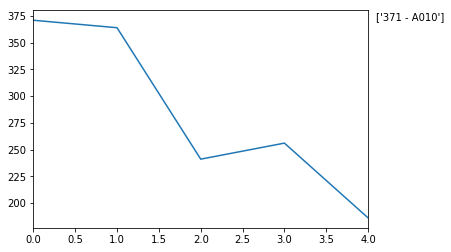

In [19]:
# Create graph
df['Projects'].plot()

# Maximum value in the data set
MaxValue = df['Projects'].max()

# Name associated with the maximum value
MaxMLI = df['MLIs'][df['Projects'] == df['Projects'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxMLI

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("The most popular MLI")
df[df['Projects'] == df['Projects'].max()]
#Sorted.head(1) can also be used